In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# Zad 1.
Wygeneruj dane z rozkładu jednostajnego na odcinku [-1,1]. 
Narysuj na jednym wykresie histogram z danych oraz gęstość rozkładu normalnego o parametrach m=0 oraz sigma =1.

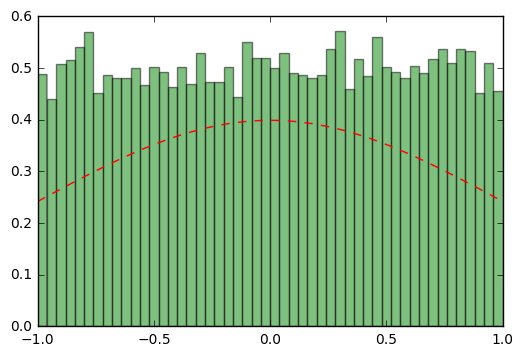

In [2]:
N = 10000
num_bins = 50

X = np.random.uniform(-1, 1, N)
bins = np.linspace(-1, 1, num_bins)
y = norm.pdf(bins, loc=0, scale=1)
plt.hist(X, num_bins, normed=1, facecolor='green', alpha=0.5)
_ = plt.plot(bins, y, 'r--')

# Zad 2.
Wygeneruj dane z rozkładu jednostajnego na odcinku [-1,1]. 
Narysuj histogram z danych oraz optymalny (najlepszy z punktu widzenia MLE [MLE](http://faculty.washington.edu/ezivot/econ583/mleLectures.pdf)) rozkład normalny opisujący dane.
Użyj estymatorów największej wiarygodności dla m i sigma.

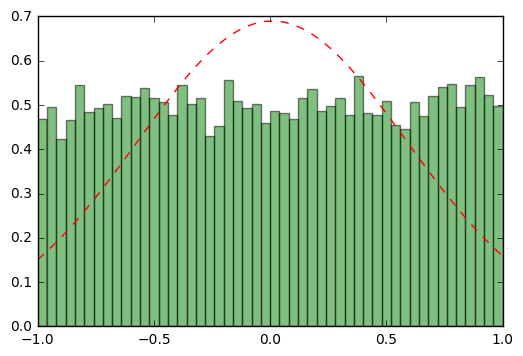

In [3]:
N = 10000
num_bins = 50

X = np.random.uniform(-1, 1, N)
bins = np.linspace(-1, 1, num_bins)

mu = X.mean(axis=0)
sigma = np.sqrt(((X - mu) ** 2).mean(axis=0))

y = norm.pdf(bins, loc=mu, scale=sigma)
plt.hist(X, num_bins, normed=1, facecolor='green', alpha=0.5)
_ = plt.plot(bins, y, 'r--')

# Zad 3.
Wygeneruj dane z rozkładu normalnego o parametrach m=0 oraz sigma =1. 
Narysuj histogram z danych oraz optymalny (najlepszy z punktu widzenia MLE) rozkład normalny opisujący dane.
Użyj estymatorów największej wiarygodności dla m i sigma.

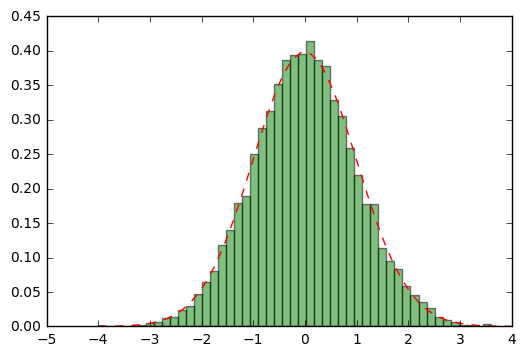

In [4]:
N = 10000
num_bins = 50

X = np.random.normal(size=N)
bins = np.linspace(-4, 4, num_bins)

mu = X.mean(axis=0)
sigma = np.sqrt(((X - mu) ** 2).mean(axis=0))

y = norm.pdf(bins, loc=mu, scale=sigma)
plt.hist(X, num_bins, normed=1, facecolor='green', alpha=0.5)
_ = plt.plot(bins, y, 'r--')

# Zad 4.
Wygeneruj dane z rozkładu jednostajnego na odcinku [-1,1]. 
Napisz funkcję wyliczającą wartość logarytmicznej funkcji wiarygodności względem rodziny rozkładów normalnych dla zadanego zbioru danych. Policz jej wartość dla próbki oraz:

* m = 0, sigma =1
* m = 1, sigma =1.1
* m = 0, sigma =0.9
* m = 1, sigma =1

In [23]:
N = 10000

X = np.random.uniform(-1, 1, size=N)

epsilon = np.nextafter(0, 1)

def loglike(X, mu, sigma):
    sigma = max(epsilon, sigma)
    n = X.shape[0]
    return min(-epsilon, (-1/2) * (n * np.log(2*np.pi) + n * np.log(sigma ** 2) + 1 / (sigma ** 2) * np.sum((X - mu) ** 2)))
    
mu_mle = X.mean(axis=0)
sigma_mle = np.sqrt(((X - mu) ** 2).mean(axis=0))

print("mu_mle, sigma_mle: ", mu_mle, sigma_mle)

print(loglike(X, mu_mle, sigma_mle))
print(loglike(X, 0, 1))
print(loglike(X, 1, 1.1))
print(loglike(X, 0, 0.9))
print(loglike(X, 1, 1))

mu_mle, sigma_mle:  -0.000168976006105 0.579920190474
-8740.63092179
-10870.8867829
-15665.7856515
-10211.7078926
-15872.576543


# Zad 5.
Wygeneruj dane z rozkładu normalnego o parametrach m=0 oraz sigma =1. 
Zminimalizuj zlogarytmowaną funkcję wiarygodności dla rodziny rozkładów normalnych względem parametrów m i sigma. Narysuj histogram z danych oraz optymalny (najlepszy z punktu widzenia MLE) rozkład normalny opisujący dane.
Użyj wyliczonych wartości m i sigma.

estimated mu and sigma:  [ -9.88591798e-04   1.00246398e+00]


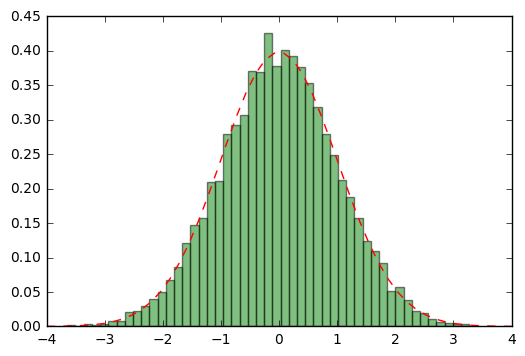

In [24]:
from scipy.optimize import minimize

N = 10000
num_bins = 50

X = np.random.normal(loc=0, scale=1, size=N)
bins = np.linspace(-4, 4, num_bins)

ans = minimize(lambda p: (-1) * loglike(X, p[0], p[1]), [0.5, 0.5], bounds = ((None, None), (0, None))).x

print("estimated mu and sigma: ", ans)

y = norm.pdf(bins, loc=ans[0], scale=ans[1])
plt.hist(X, num_bins, normed=1, facecolor='green', alpha=0.5)
_ = plt.plot(bins, y, 'r--')

# Zad 6.
Wygeneruj dane z rozkładu jednostajnego na odcinku [-1,1]. Zminimalizuj zlogarytmowaną funkcję wiarygodności dla rodziny rozkładów Split Normal Distribution [link](http://ww2.ii.uj.edu.pl/~spurek/AD_15_16/1.pdf) względem parametrów m, sigma i tau. Narysuj histogram z danych oraz optymalny (najlepszy z punktu widzenia MLE) rozkład Split Normal Distribution.

estimated mu, sigma and tau:  [ 0.74179141  0.99664626  0.14184089]


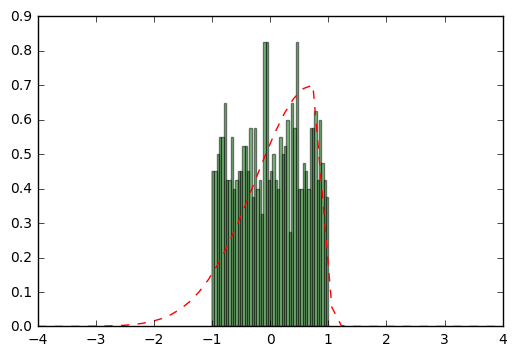

In [13]:
N = 1000
num_bins = 50

X = np.random.uniform(-1, 1, size=N)
bins = np.linspace(-4, 4, num_bins)

@np.vectorize
def split_gauss_pdf(x, mu, sigma, tau):
    c =  1 / (sigma + tau)
    if x < mu:
        scale = sigma
    else:
        scale = tau
    return 2 * c * scale * norm.pdf(x, loc=mu, scale=scale)

def loglike_split(X, mu, sigma, tau):
    sigma = max(epsilon, sigma)
    tau = max(epsilon, tau)
    return min(-epsilon, np.sum(np.log(split_gauss_pdf(X, mu, sigma, tau))))

ans = minimize(lambda p: (-1) * loglike_split(X, p[0], p[1], p[2]),
             [1, 1, 1],
             bounds = ((None, None), (0.1, None), (0.1, None))).x

print("estimated mu, sigma and tau: ", ans)

y = split_gauss_pdf(bins, mu=ans[0], sigma=ans[1], tau=ans[2])
plt.hist(X, num_bins, normed=1, facecolor='green', alpha=0.5)
_ = plt.plot(bins, y, 'r--')

# Zad 7.
Pobierz dowolny plik z dźwiękiem [pliki](https://research.ics.aalto.fi/ica/cocktail/cocktail_en.cgi). Zminimalizuj zlogarytmowaną funkcję wiarygodności dla rodziny rozkładów:

* Rozkładów normalnych
* Split Normal Distribution

Narysuj wyniki ora porównaj wartości zlogarytmowanej funkcji wiarygodności.

estimated mu and sigma:  [ 127.45731979   21.7502275 ]
estimated mu, sigma and tau:  [ 130.23682021   23.56850276   19.79566316]
loglike of normal: -44985.5149932
loglike of split: -44954.2555794


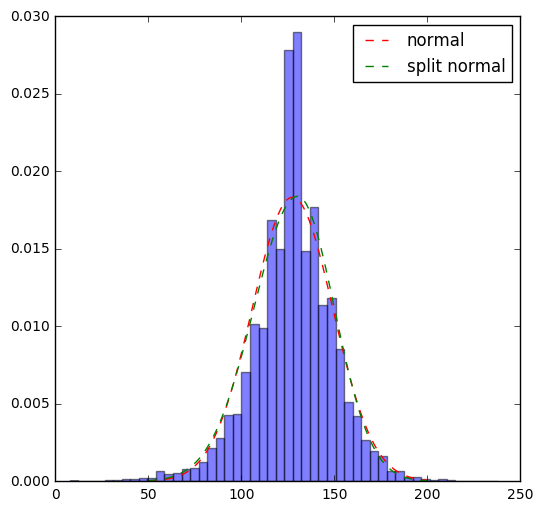

In [64]:
from scipy.io.wavfile import read

data = read("files/100001000mix1.wav")
audio = data[1][:10000]

num_bins = 50

norm_params = minimize(lambda p: (-1) * loglike(audio, p[0], p[1]), 
                       [130, 1], 
                       bounds = ((None, None), (0.1, None))).x
#print(norm_params)
split_params = minimize(lambda p: (-1) * loglike_split(audio, p[0], p[1], p[2]), 
                        [130, 10, 5], 
                        bounds = ((None, None), (0.1, None), (0.1, None))).x

print("estimated mu and sigma: ", norm_params)
print("estimated mu, sigma and tau: ", split_params)

print("loglike of normal:", loglike(audio, norm_params[0], norm_params[1]))
print("loglike of split:", loglike_split(audio, split_params[0], split_params[1], split_params[2]))

bins = np.linspace(50, 200, 100)

y_norm = norm.pdf(bins, loc=norm_params[0], scale=norm_params[1])
y_split = split_gauss_pdf(bins, mu=split_params[0], sigma=split_params[1], tau=split_params[2])

plt.figure(figsize=(6,6))
plt.hist(audio, num_bins, normed=1, alpha=0.5)
plt.plot(bins, y_norm, 'r--')
plt.plot(bins, y_split, 'g--')
_ = plt.legend(["normal", "split normal"])